# polyfit.py

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [20]:
#Return fitted model parameters to the dataset at datapath for each choice in degrees.
#Input: datapath as a string specifying a .txt file, degrees as a list of positive integers.
#Output: paramFits, a list with the same length as degrees, where paramFits[i] is the list of
#coefficients when fitting a polynomial of d = degrees[i].
def main(datapath, degrees):
    paramFits = []

    #fill in
    #read the input file, assuming it has two columns, where each row is of the form [x y] as
    #in poly.txt.
    #iterate through each n in degrees, calling the feature_matrix and least_squares functions to solve
    #for the model parameters in each case. Append the result to paramFits each time.

    with open(datapath, 'r') as file:
        data = file.readlines()
        x = [float(j[0]) for j in (i.split() for i in data)]
        y = [float(j[1]) for j in (i.split() for i in data)]
    
    for d in degrees:
        ftr_mat = feature_matrix(x, d)
        b = least_squares(ftr_mat, y)
        paramFits.append(b)
    return paramFits

In [12]:
#Return the feature matrix for fitting a polynomial of degree d based on the explanatory variable
#samples in x.
#Input: x as a list of the independent variable samples, and d as an integer.
#Output: X, a list of features for each sample, where X[i][j] corresponds to the jth coefficient
#for the ith sample. Viewed as a matrix, X should have dimension #samples by d+1.
def feature_matrix(x, d):

    #fill in
    #There are several ways to write this function. The most efficient would be a nested list comprehension
    #which for each sample in x calculates x^d, x^(d-1), ..., x^0.
    X = [[n ** d for d in range(d, -1, -1)] for n in x]
    return X

In [16]:
#Return the least squares solution based on the feature matrix X and corresponding target variable samples in y.
#Input: X as a list of features for each sample, and y as a list of target variable samples.
#Output: B, a list of the fitted model parameters based on the least squares solution.
def least_squares(X, y):
    X = np.array(X)
    y = np.array(y)

    #fill in
    #Use the matrix algebra functions in numpy to solve the least squares equations. This can be done in just one line.
    least_sqrs = np.linalg.inv(X.T @ X) @ X.T @ y
    B = least_sqrs.tolist()
    return B

In [42]:
datapath = 'poly.txt'
degrees = [1,2,3,4,5]

In [43]:
paramFits = main(datapath, degrees)
print(paramFits)

[[52.158053801747215, -189.86610574097074], [7.001583333198915, 9.303864260428877, -239.3340329835961], [0.8201380988526162, 0.26176712315847694, -0.010327670472122463, -175.27713200891657], [0.005987963794383017, 0.7552180459273519, 0.23455985383724576, 1.1763636032250524, -175.88028826172473], [0.0008531198983952847, -0.004698036593498531, 0.7528113266207407, 0.5260849950247835, 0.9659162450400247, -176.83736889212605]]


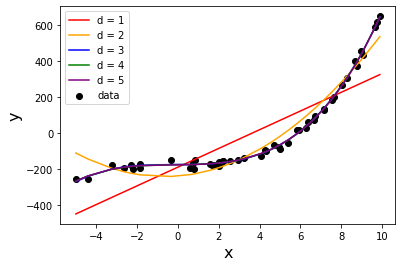

In [74]:
# Code for Problem 1: Part 3 - Graphing Degree Polynomials
with open(datapath, 'r') as file:
    data = file.readlines()
    x = [float(j[0]) for j in (i.split() for i in data)]
    y = [float(j[1]) for j in (i.split() for i in data)]
x, y = zip(*sorted(zip(x, y)))
x = np.array(x)
# Plotting Original Data
plt.scatter(x, y, color='black', label='data')

# Plotting Polynomial d = 1
coeffList_d_1 = paramFits[0]
y = coeffList_d_1[0]*x + coeffList_d_1[1]
plt.plot(x,y, color='red', label='d = 1')

# Plotting Polynomial d = 2
coeffList_d_2 = paramFits[1]
y = coeffList_d_2[0]*(x**2) + coeffList_d_2[1]*x + coeffList_d_2[2]
plt.plot(x,y, color='orange', label='d = 2')

# Plotting Polynomial d = 3
coeffList_d_3 = paramFits[2]
y = coeffList_d_3[0]*(x**3) + coeffList_d_3[1]*(x**2) + coeffList_d_3[2]*x + coeffList_d_3[3]
plt.plot(x,y, color='blue', label='d = 3')

# Plotting Polynomial d = 4
coeffList_d_4 = paramFits[3]
y = coeffList_d_4[0]*(x**4) + coeffList_d_4[1]*(x**3) + coeffList_d_4[2]*(x**2) + coeffList_d_4[3]*x + coeffList_d_4[4]
plt.plot(x,y, color='green', label='d = 4')

# Plotting Polynomial d = 5
coeffList_d_5 = paramFits[4]
y = coeffList_d_5[0]*(x**5) + coeffList_d_5[1]*(x**4) + coeffList_d_5[2]*(x**3) + coeffList_d_5[3]*(x**2) + coeffList_d_5[4]*x + coeffList_d_5[5]
plt.plot(x,y, color='purple', label='d = 5')

# Labeling Data
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.legend(fontsize=10, loc='upper left')
plt.show()

# regularize-cv.py

In [79]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import matplotlib.pyplot as plt

In [80]:
def main():
    #Importing dataset
    diamonds = pd.read_csv('diamonds.csv')

    #Feature and target matrices
    X = diamonds[['carat', 'depth', 'table', 'x', 'y', 'z', 'clarity', 'cut', 'color']]
    y = diamonds[['price']]

    #Training and testing split, with 25% of the data reserved as the test set
    X = X.to_numpy()
    y = y.to_numpy()
    [X_train, X_test, y_train, y_test] = train_test_split(X, y, test_size=0.25, random_state=101)

    #Normalizing training and testing data
    [X_train, trn_mean, trn_std] = normalize_train(X_train)
    X_test = normalize_test(X_test, trn_mean, trn_std)

    #Define the range of lambda to test
    lmbda = np.logspace(-1, 2, num=101) # Lambda Values Needed for Submission

    MODEL = []
    MSE = []
    for l in lmbda:
        #Train the regression model using a regularization parameter of l
        model = train_model(X_train,y_train,l)

        #Evaluate the MSE on the test set
        mse = error(X_test,y_test,model)

        #Store the model and mse in lists for further processing
        MODEL.append(model)
        MSE.append(mse)

    #Plot the MSE as a function of lmbda
    plt.plot(lmbda, MSE)
    plt.xlabel('Lambda')
    plt.ylabel('MSE')
    plt.title('MSE as a Function of lambda')
    plt.grid(True)
    plt.show()

    #Find best value of lmbda in terms of MSE
    ind = MSE.index(min(MSE))
    [lmda_best,MSE_best,model_best] = [lmbda[ind],MSE[ind],MODEL[ind]]

    print('Best lambda tested is ' + str(lmda_best) + ', which yields an MSE of ' + str(MSE_best))

    return model_best

In [81]:
#Function that normalizes features in training set to zero mean and unit variance.
#Input: training data X_train
#Output: the normalized version of the feature matrix: X, the mean of each column in
#training set: trn_mean, the std dev of each column in training set: trn_std.
def normalize_train(X_train):

    mean = np.mean(X_train, axis = 0)
    std = np.std(X_train, axis = 0)
    
    X = (X_train - mean) /std

    return X, mean, std

In [82]:
#Function that normalizes testing set according to mean and std of training set
#Input: testing data: X_test, mean of each column in training set: trn_mean, standard deviation of each
#column in training set: trn_std
#Output: X, the normalized version of the feature matrix, X_test.
def normalize_test(X_test, trn_mean, trn_std):

    X = (X_test - trn_mean) /trn_std

    return X

In [83]:
#Function that trains a ridge regression model on the input dataset with lambda=l.
#Input: Feature matrix X, target variable vector y, regularization parameter l.
#Output: model, a numpy object containing the trained model.
def train_model(X,y,l):

    model = linear_model.Ridge(alpha=l, fit_intercept=True)
    model.fit(X, y)

    return model

In [84]:
#Function that calculates the mean squared error of the model on the input dataset.
#Input: Feature matrix X, target variable vector y, numpy model object
#Output: mse, the mean squared error
def error(X,y,model):
    
    y = np.array(y)
    y_hat = model.predict(X)
    mse = np.mean((y - y_hat) ** 2)
    
    return mse

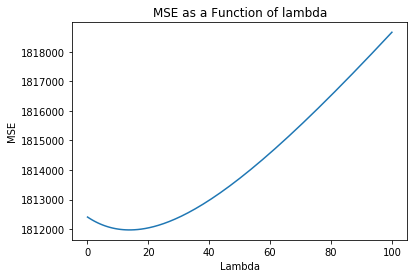

Best lambda tested is 13.489628825916533, which yields an MSE of 1811976.570268438
[[ 5115.65136992  -201.49769618  -207.15474973 -1338.29096939
    219.18597862   -66.36405012   500.9098275     74.30622797
   -459.07248485]]
[3928.07687554]


In [85]:
model_best = main()
print(model_best.coef_)
print(model_best.intercept_)
    

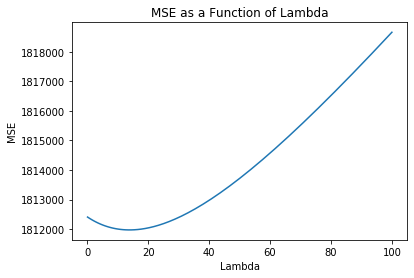

Best lambda tested is 13.489628825916533, which yields an MSE of 1811976.570268438
[[ 5115.65136992  -201.49769618  -207.15474973 -1338.29096939
    219.18597862   -66.36405012   500.9098275     74.30622797
   -459.07248485]]
[3928.07687554]


In [108]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import matplotlib.pyplot as plt


def main():
    #Importing dataset
    diamonds = pd.read_csv('diamonds.csv')

    #Feature and target matrices
    X = diamonds[['carat', 'depth', 'table', 'x', 'y', 'z', 'clarity', 'cut', 'color']]
    y = diamonds[['price']]

    #Training and testing split, with 25% of the data reserved as the test set
    X = X.to_numpy()
    y = y.to_numpy()
    [X_train, X_test, y_train, y_test] = train_test_split(X, y, test_size=0.25, random_state=101)

    #Normalizing training and testing data
    [X_train, trn_mean, trn_std] = normalize_train(X_train)
    X_test = normalize_test(X_test, trn_mean, trn_std)

    #Define the range of lambda to test
    lmbda = np.logspace(-1, 2, num=101) # Lambda Values Needed for Submission
    #lmbda=[1,100]
    MODEL = []
    MSE = []
    for l in lmbda:
        #Train the regression model using a regularization parameter of l
        model = train_model(X_train,y_train,l)

        #Evaluate the MSE on the test set
        mse = error(X_test,y_test,model)

        #Store the model and mse in lists for further processing
        MODEL.append(model)
        MSE.append(mse)

    #Plot the MSE as a function of lmbda
    plt.plot(lmbda, MSE)
    plt.xlabel('Lambda')
    plt.ylabel('MSE')
    plt.title('MSE as a Function of Lambda')
    plt.show()

    #Find best value of lmbda in terms of MSE
    ind = MSE.index(min(MSE))
    [lmda_best,MSE_best,model_best] = [lmbda[ind],MSE[ind],MODEL[ind]]

    print('Best lambda tested is ' + str(lmda_best) + ', which yields an MSE of ' + str(MSE_best))

    return model_best


#Function that normalizes features in training set to zero mean and unit variance.
#Input: training data X_train
#Output: the normalized version of the feature matrix: X, the mean of each column in
#training set: trn_mean, the std dev of each column in training set: trn_std.
def normalize_train(X_train):

    mean = np.mean(X_train, axis = 0)
    std = np.std(X_train, axis = 0)
    
    X = (X_train - mean) /std

    return X, mean, std


#Function that normalizes testing set according to mean and std of training set
#Input: testing data: X_test, mean of each column in training set: trn_mean, standard deviation of each
#column in training set: trn_std
#Output: X, the normalized version of the feature matrix, X_test.
def normalize_test(X_test, trn_mean, trn_std):

    X = (X_test- trn_mean)/ trn_std
    
    return X


#Function that trains a ridge regression model on the input dataset with lambda=l.
#Input: Feature matrix X, target variable vector y, regularization parameter l.
#Output: model, a numpy object containing the trained model.
def train_model(X,y,l):

    model = linear_model.Ridge(alpha=l, fit_intercept=True)
    model.fit(X, y)

    return model


#Function that calculates the mean squared error of the model on the input dataset.
#Input: Feature matrix X, target variable vector y, numpy model object
#Output: mse, the mean squared error
def error(X,y,model):

    y = np.array(y)
    y_hat = model.predict(X)
    mse = np.mean((y - y_hat) ** 2)

    return mse

if __name__ == '__main__':
    model_best = main()
    print(model_best.coef_)
    print(model_best.intercept_)
    


In [109]:
np.dot(model_best.coef_, np.array([0.25,3,3,5, 60,55,4,3,2]))

array([4171.04964293])